<a href="https://colab.research.google.com/github/sayeemabdullah/Twitter-User-Gender-Prediction/blob/main/TwitterUserGenderPredictionUsingUser'sProfileDescription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
# https://www.kaggle.com/crowdflower/twitter-user-gender-classification

# unitid: a unique id for user
# _golden: whether the user was included in the gold standard for the model; TRUE or FALSE
# unitstate: state of the observation; one of finalized (for contributor-judged) or golden (for gold standard observations)
# trustedjudgments: number of trusted judgments (int); always 3 for non-golden, and what may be a unique id for gold standard observations
# lastjudgment_at: date and time of last contributor judgment; blank for gold standard observations
# gender: one of male, female, or brand (for non-human profiles)
# gender:confidence: a float representing confidence in the provided gender
# profile_yn: "no" here seems to mean that the profile was meant to be part of the dataset but was not available when contributors went to judge it
# profile_yn:confidence: confidence in the existence/non-existence of the profile
# created: date and time when the profile was created
# description: the user's profile description
# fav_number: number of tweets the user has favorited
# gender_gold: if the profile is golden, what is the gender?
# link_color: the link color on the profile, as a hex value
# name: the user's name
# profileyngold: whether the profile y/n value is golden
# profileimage: a link to the profile image
# retweet_count: number of times the user has retweeted (or possibly, been retweeted)
# sidebar_color: color of the profile sidebar, as a hex value
# text: text of a random one of the user's tweets
# tweet_coord: if the user has location turned on, the coordinates as a string with the format "[latitude, longitude]"
# tweet_count: number of tweets that the user has posted
# tweet_created: when the random tweet (in the text column) was created
# tweet_id: the tweet id of the random tweet
# tweet_location: location of the tweet; seems to not be particularly normalized
# user_timezone: the timezone of the user

In [147]:
import pandas as pd

url = 'https://raw.githubusercontent.com/sayeemabdullah/Twitter-User-Gender-Prediction/main/Dataset/gender-classifier-DFE-791531.csv'

df = pd.read_csv(url,encoding = "ISO-8859-1")

print(df.columns)

df.drop(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'], axis='columns', inplace=True)

print(df.columns)

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')
Index(['gender', 'description'], dtype='object')


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       19953 non-null  object
 1   description  16306 non-null  object
dtypes: object(2)
memory usage: 313.4+ KB


In [149]:
df.drop(df.index[(df['gender'] != 'male') & (df['gender'] != 'female')  & (df['gender'] != 'brand')], inplace = True)
df.reset_index(drop=True, inplace=True)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18836 entries, 0 to 18835
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       18836 non-null  object
 1   description  15522 non-null  object
dtypes: object(2)
memory usage: 294.4+ KB


In [151]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15522 entries, 0 to 15521
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       15522 non-null  object
 1   description  15522 non-null  object
dtypes: object(2)
memory usage: 242.7+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


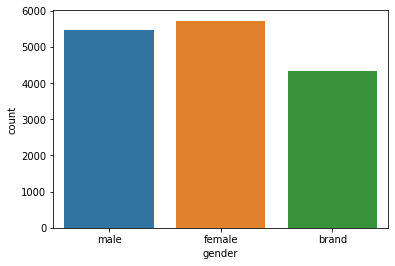

In [161]:
import seaborn as sb

sb.countplot(df['gender'])

In [154]:
target_list = df['gender'].tolist()

for i in range(len(df.gender)):
  if df.gender[i] == "male":
    target_list[i] = 1
  elif df.gender[i] == "female":
    target_list[i] = 2
  else:
    target_list[i] = 3

df['gender_code'] = target_list

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15522 entries, 0 to 15521
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       15522 non-null  object
 1   description  15522 non-null  object
 2   gender_code  15522 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 363.9+ KB


In [156]:
import re
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = s.replace(",","")
    s = re.sub('[!@#$_]', '', s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub('\s\W',' ',s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace("[\w*"," ")
    return s

df['description'] = [cleaning(s) for s in df['description']]
df.tail()

,gender,description,gender_code
15517,female,rp,2
15518,male,whatever you like it s not a problem at all ch...,1
15519,male,teambarcelona you look lost so you should foll...,1
15520,female,anti statist i homeschool my kids aspiring tho...,2
15521,female,teamwork makes the dream work,2


In [157]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer(text_description): 
    return text_description.split()

def tokenizer_porter(text_description):
    return [porter.stem(word) for word in text_description.split()]

In [158]:
x = df['description'].values
y = df['gender_code'].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter)
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(multi_class='ovr', random_state=0))])

clf.fit(x_train, y_train)

predictions = clf.predict(x_test)
print('Accuracy:',accuracy_score(y_test,predictions))

Accuracy: 0.619712261112304


In [159]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

from sklearn.svm import SVC

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter)
clf = Pipeline([('vect', tfidf),
                ('clf', SVC(kernel = 'linear'))])

clf.fit(x_train, y_train)

predictions = clf.predict(x_test)
print('Accuracy:',accuracy_score(y_test,predictions))

Accuracy: 0.619712261112304


In [160]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestClassifier

n = range (1,100,10)

tfidf = TfidfVectorizer(lowercase=False,
                        tokenizer=tokenizer_porter)
clf = Pipeline([('vect', tfidf),
                ('clf', RandomForestClassifier(n_estimators = 40, random_state=0))])

clf.fit(x_train, y_train)

predictions = clf.predict(x_test)
print('Accuracy:',accuracy_score(y_test,predictions))

Accuracy: 0.6001717844105647
